## 데이터의 불균형 문제 처리
- 정상의 데이터를 정확하게 분류하는 것과 이상의 데이터를 정확하게 분류하는 것 중에 이상을 정확하게 분류하는 것이 중요
- 보통 이상의 데이터가 target값이 되는 경우가 많다
- 데이터가 불균형할 때는 분류의 성능과 target 데이터를 정확히 분류해내는 목표가 일치않게 되는 문제가 발생
- 이러한 경우에 분석 결과의 해석뿐만 아니라 머신러닝 등 모델링에서 문제 발생
- 소수의 데이터인 target의 중요도를 낮게 판단함으로 궁극적으로는 분석가능한 모델을 만들 수가 없게 된다.
- 이러한 문제를 해결하기 위해서는 소수의 비정상 데이터를 늘리는 작업인 오버 샘플링, 상대적으로 많은 데이터에서 일부만 사용하는 언더 샘플링 작업이 존재

In [2]:
#!pip install imbalanced-learn

### 언더 샘플링
- 다수의 레벨의 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 라벨의 수 수준으로 감소시키는 방법
- 이 기법은 데이터 불균형 문제를 해결할 수 있지만 전체 데이터의 수가 급격하게 줄어들어 학습 성능을 떨어뜨릴 수 있다는 단점

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [4]:
## foseja epdlxjfmf 95:5 불균형 데이터를 생성
x,y = make_classification(n_samples=2000,n_features=6,weights=[0.95],flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


In [5]:
## 랜덤 언더 샘플링은 다수를 차지하는 라벨에서 무작위로 데이터를 제거하는 방법
## sampling_stratery 속성의 값을 majority로 지정하면 다수 라벨의 데이터를 샘플링하여 소수 라벨의 데이터 수와 동일하게 줄인다
## 0과 1 사이의 숫자 값을 지정하면 소수 라벨의 데이터 수와 다수 라벨의 데이터 수가 해당 비율이 되도록 조정
undersample= RandomUnderSampler(sampling_strategy='majority')
x_under,y_under =undersample.fit_resample(x,y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [9]:
undersample2= RandomUnderSampler(sampling_strategy=0.52)
x_under2,y_under2 =undersample2.fit_resample(x,y)
print(Counter(y_under2))

Counter({0: 192, 1: 100})


### 오버 샘플링
- 소수의 라벨을 지닌 데이터세트를 다수 라벨이 지닌 데이터의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 방법
- 데이터의 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용

In [12]:
## 랜덤 오버 샘플링
## 소소의 라벨을 지닌 데이터세트를 단순 복제하여 다수의 라벨과 비율을 맞추는 방법
## 오버피팅의 위험성이 있지만, 불균형 문제를 처리하지 않는 것보다는 유효

from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.5)
x_over,y_over =oversample.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [14]:
oversample2=RandomOverSampler(sampling_strategy='minority')
x_over2,y_over2 =oversample2.fit_resample(x,y)
print(Counter(y_over2))

Counter({0: 1900, 1: 1900})


In [15]:
## SMOTE
## 소수 라벨을 지닌 데이터세트의 관측 값에 대한 K개의 최근접 이웃을 잡고 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법

from imblearn.over_sampling import SMOTE
smote_sample=SMOTE(sampling_strategy='minority')
x_sm,y_sm =smote_sample.fit_resample(x,y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


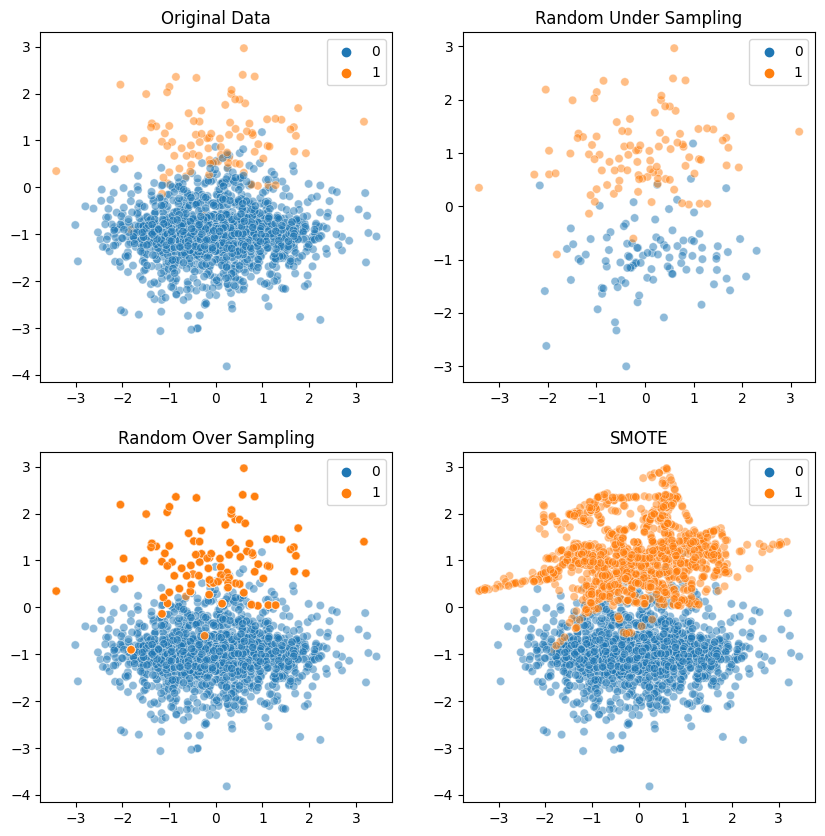

In [19]:
### 랜덤 오버 샘플링을 한 데이터를 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes= plt.subplots(nrows=2,ncols=2,figsize=(10,10))

sns.scatterplot(x=x[:,1],y=x[:,2],hue=y,ax=axes[0][0],alpha=0.5)
sns.scatterplot(x=x_under[:,1],y=x_under[:,2],hue=y_under,ax=axes[0][1],alpha=0.5)
sns.scatterplot(x=x_over[:,1],y=x_over[:,2],hue=y_over,ax=axes[1][0],alpha=0.5)
sns.scatterplot(x=x_sm[:,1],y=x_sm[:,2],hue=y_sm,ax=axes[1][1],alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()